Polynomial Features and Classification


We will train three Logistic Regression models using polynomial features of degrees 1, 2, and 5, and compare their decision boundaries.



In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

import warnings

from sklearn import set_config
set_config(display="diagram")
warnings.filterwarnings("ignore", "warning")
import seaborn as sns

In [113]:
X, y = load_wine(return_X_y=True, as_frame=True)

In [114]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [115]:
X1 = X[['total_phenols', 'color_intensity']]

<Axes: xlabel='total_phenols', ylabel='color_intensity'>

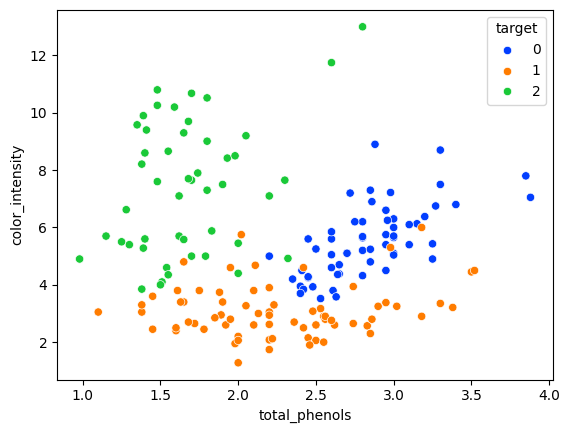

In [116]:
sns.scatterplot(data = X1, x = 'total_phenols', y = 'color_intensity', hue = y, palette='bright')

#### Logistic Regression

Below, fit a `LogisticRegression` estimator with `multi_class = 'multinomial'` on `X1` and `y`. Assign the result to `lgr`.

Uncomment the code to visualize the decision boundary of the resulting estimator assigned to `lgr` below.

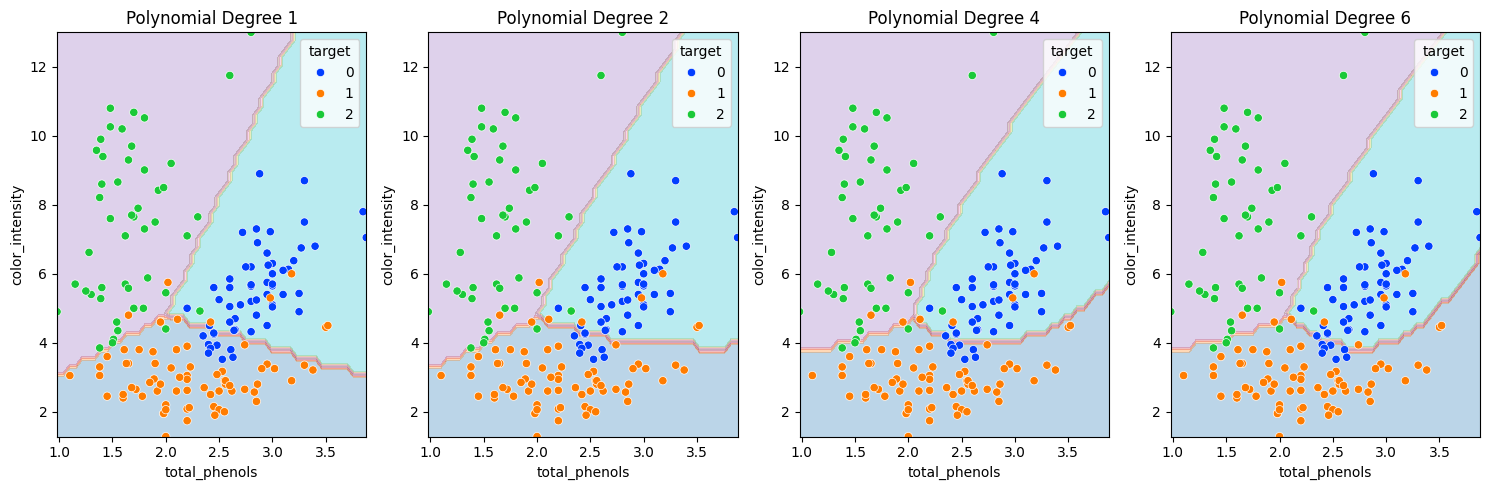

In [117]:
# Create subplots (1 row, 4 columns)
fig, axes = plt.subplots(1, 4, figsize=(15, 5))  # 15x5 inches

# Generate meshgrid (only once)
xx = np.linspace(X1.iloc[:, 0].min(), X1.iloc[:, 0].max(), 50)
yy = np.linspace(X1.iloc[:, 1].min(), X1.iloc[:, 1].max(), 50)
XX, YY = np.meshgrid(xx, yy)
grid = np.c_[XX.ravel(), YY.ravel()]

# Loop through polynomial degrees
degrees = [1, 2, 4, 6]
for i, d in enumerate(degrees):

    pipe = Pipeline([
        ('poly', PolynomialFeatures(degree=d)),
        ('scale', StandardScaler()),
        ('lgr', LogisticRegression(multi_class='multinomial'))
    ])

    pipe.fit(X1, y)
    # Train logistic regression with polynomial features (assuming `lgr` is fitted for each degree)
    labels = pd.factorize(pipe.predict(grid))[0]
    
    # Decision boundary
    axes[i].contourf(xx, yy, labels.reshape(XX.shape), cmap='tab10', alpha=0.3)

    # Scatter plot
    sns.scatterplot(data=X1, x='total_phenols', y='color_intensity', hue=y, palette='bright', ax=axes[i])

    # Title
    axes[i].set_title(f'Polynomial Degree {d}')

# Adjust layout
plt.tight_layout()
plt.show()